Data source:
https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge

## Importing libraries and the dataset

In [1]:
# Import relevant packages
import matplotlib.pyplot as plt
import nltk
import numpy as np
import re 
import pandas as pd
import string
import seaborn as sns

from nltk.corpus import stopwords  # Remove useless words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [2]:
# Stopwords are a list of 'useless' words
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

### Analysing the dataset

In [3]:
data = pd.read_csv('train.csv')
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


0 - non-toxic.

In [4]:
toxic_df = data[(data == 1).any(axis=1)]
toxic_df.tail(3)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159541,ffa33d3122b599d6,Your absurd edits \r\n\r\nYour absurd edits on...,1,0,1,0,1,0
159546,ffb47123b2d82762,"""\r\n\r\nHey listen don't you ever!!!! Delete ...",1,0,0,0,1,0
159554,ffbdbb0483ed0841,and i'm going to keep posting the stuff u dele...,1,0,1,0,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


### Analysing comment's 

In [6]:
data['comment_text'][0]

"Explanation\r\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [7]:
data['comment_text'][3]

'"\r\nMore\r\nI can\'t make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\r\n\r\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It\'s listed in the relevant form eg Wikipedia:Good_article_nominations#Transport  "'

## Exploratory Data Analysis

In [8]:
data['toxic'].value_counts(normalize=True)

toxic
0    0.904156
1    0.095844
Name: proportion, dtype: float64

In [9]:
data['toxic'].astype('bool').mean()

0.09584448302009764

In [10]:
1 - data['toxic'].astype('bool').mean()

0.9041555169799024

In [11]:
ls = list(data.columns[2:])
D = data[ls]
toxic_df = D[(D == 1).any(axis=1)]
non_toxic_df = D[(D == 0).all(axis=1)]
print('Count of TOXIC comments - ',toxic_df.shape[0])
print('Count of NON - TOXIC comments - ',non_toxic_df.shape[0])

Count of TOXIC comments -  16225
Count of NON - TOXIC comments -  143346


## VISUALISATIONS
### BAR GRAPH

159571


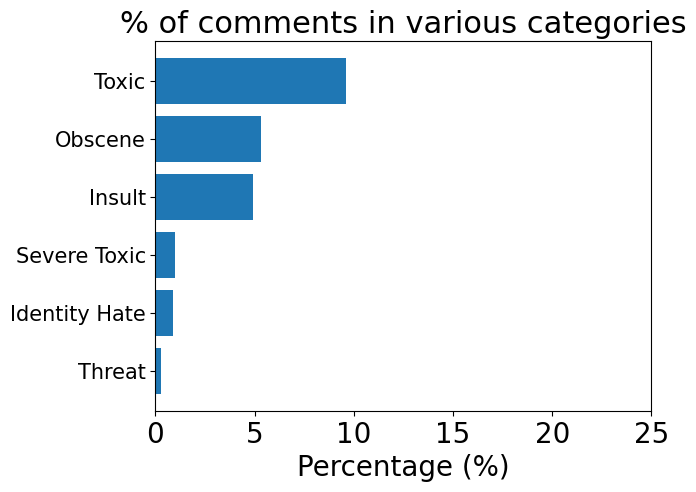

In [12]:
# bar graph 
num_rows = len(data)
print(num_rows)
sum_tox = data['toxic'].sum() / num_rows * 100
sum_sev = data['severe_toxic'].sum() / num_rows * 100
sum_obs = data['obscene'].sum() / num_rows * 100
sum_thr = data['threat'].sum() / num_rows * 100
sum_ins = data['insult'].sum() / num_rows * 100
sum_ide = data['identity_hate'].sum() / num_rows * 100

# Initiate a list of 6 values that represent the 6 x-axis values for the categories
ind = np.arange(6)
ax = plt.barh(ind, [sum_tox, sum_obs, sum_ins, sum_sev, sum_ide, sum_thr])
plt.xlabel('Percentage (%)', size=20)
plt.xticks(np.arange(0, 30, 5), size=20)
plt.title('% of comments in various categories', size=22)
plt.yticks(ind, ('Toxic', 'Obscene', 'Insult', 'Severe Toxic', 'Identity Hate', 'Threat', ), size=15)

plt.gca().invert_yaxis()
# plt.gca().ticklabel_format(style='plain', axis='y')
plt.show()


## HEATMAP

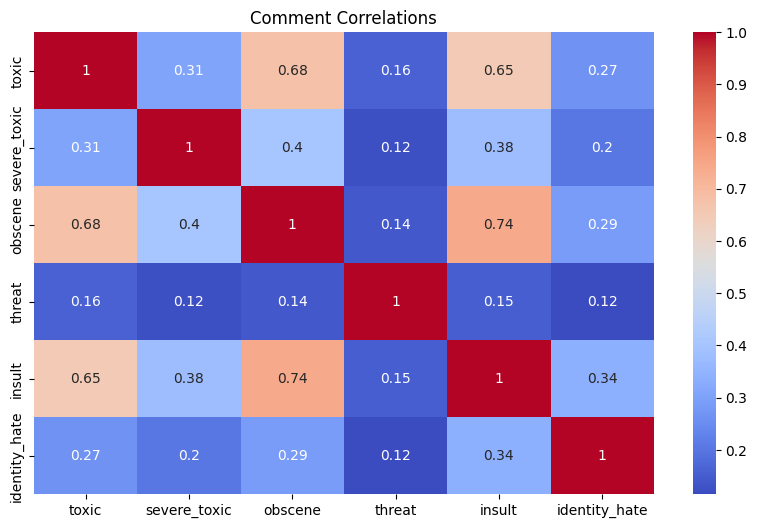

In [13]:
plt.figure(figsize=(10, 6))
correlation = data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Comment Correlations')
plt.show()

### PIE CHART

In [14]:
data_count=data.iloc[:,2:].sum()

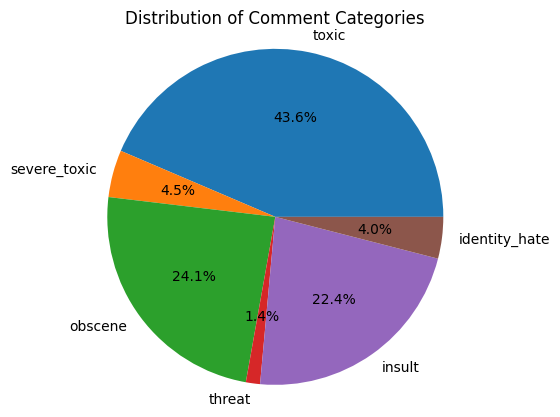

In [15]:
plt.pie(data_count.values, labels=data.columns[2:], autopct='%1.1f%%')
plt.title('Distribution of Comment Categories')
plt.axis('equal')
plt.show()

## Preprocessing the text

In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import re
import string

# Define the list of stopwords
stop_words = set(stopwords.words('english'))

# Text preprocessing steps - remove numbers, capital letters, punctuation, '\n', and stopwords
def preprocess_text(text):
    # remove all numbers with letters attached to them
    text = re.sub('\w*\d\w*', ' ', text)
    
    # replace punctuation with white space and convert to lowercase
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text.lower())
    
    # remove '\n' and replace with a space
    text = re.sub("\n", " ", text)
    
    # remove non-ascii characters
    text = re.sub(r'[^\x00-\x7f]', ' ', text)
    
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Remove stopwords from the text
    words = [word for word in words if word.casefold() not in stop_words]
    
    # Join the words back into a string
    processed_text = ' '.join(words)
    
    return processed_text

# Apply the preprocess_text function to the 'comment_text' column
data['comment_text'] = data['comment_text'].map(preprocess_text)

In [18]:
data['comment_text'][0]

'explanation edits made username hardcore metallica fan reverted vandalisms closure gas voted new york dolls fac please remove template talk page since retired'

## Partitioning the dataset according to toxicity

In [19]:
data_tox = data.loc[:,['id','comment_text','toxic']]

In [20]:
data_tox['comment_text'][0]

'explanation edits made username hardcore metallica fan reverted vandalisms closure gas voted new york dolls fac please remove template talk page since retired'

In [21]:
data_tox['comment_text'][1]

'aww matches background colour seemingly stuck thanks talk january utc'

In [22]:
data_sev = data.loc[:,['id','comment_text','severe_toxic']]

In [23]:
data_obs = data.loc[:,['id','comment_text','obscene']]

In [24]:
data_thr = data.loc[:,['id','comment_text','threat']]

In [25]:
data_ins = data.loc[:,['id','comment_text','insult']]

In [26]:
data_ide = data.loc[:,['id','comment_text','identity_hate']]

## Creating WordCloud
### Useful to show the words which occur most frequently for each category.

In [27]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [28]:
def wordcloud(df, label):
    
    # Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="black",max_words=4000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

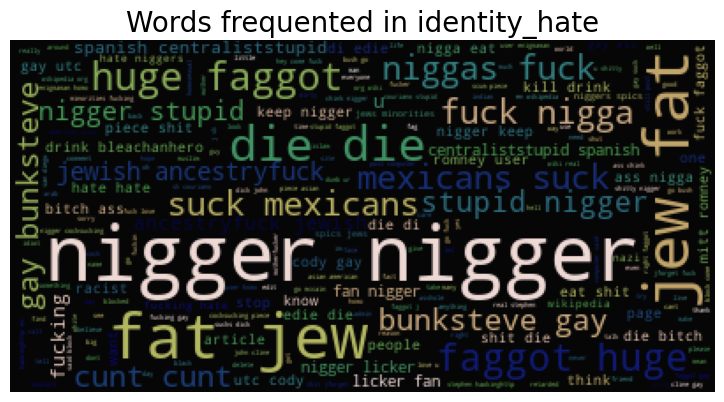

In [29]:
wordcloud(data_ide,'identity_hate')

#### Comments that are toxic (and other forms of toxicity) make up less than 10% of the comments in the data - unbalance.

#### We can deal with class imbalance by taking a subset of the data where the proportion of the toxic comments are at least 20% (ideally 50%) in relation to non-toxic comments.


In [30]:
data_tox.head()

,id,comment_text,toxic
0,0000997932d777bf,explanation edits made username hardcore metal...,0
1,000103f0d9cfb60f,aww matches background colour seemingly stuck ...,0
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0
3,0001b41b1c6bb37e,make real suggestions improvement wondered sec...,0
4,0001d958c54c6e35,sir hero chance remember page,0


In [31]:
data_tox_1 = data_tox[data_tox['toxic'] == 1].iloc[0:5000,:]
data_tox_1.shape

(5000, 3)

In [32]:
data_tox_0 = data_tox[data_tox['toxic'] == 0].iloc[0:5000,:]

In [33]:
data_tox_done = pd.concat([data_tox_1, data_tox_0], axis=0)
data_tox_done.shape

(10000, 3)

#### Not all categories have 5000 rows.

In [34]:
data_sev[data_sev['severe_toxic'] == 1].count()

id              1595
comment_text    1595
severe_toxic    1595
dtype: int64

In [35]:
data_sev_1 = data_sev[data_sev['severe_toxic'] == 1].iloc[0:1595,:]
data_sev_0 = data_sev[data_sev['severe_toxic'] == 0].iloc[0:1595,:]
data_sev_done = pd.concat([data_sev_1, data_sev_0], axis=0)
data_sev_done.shape

(3190, 3)

Cool. We only had 1,595 comments that are severely toxic. We combine it together with another 1,595 comments that are not toxic to form a new dataset that is balanced. We repeat this for all other categories.

In [36]:
data_obs[data_obs['obscene'] == 1].count()

id              8449
comment_text    8449
obscene         8449
dtype: int64

In [37]:
data_obs_1 = data_obs[data_obs['obscene'] == 1].iloc[0:5000,:]
data_obs_0 = data_obs[data_obs['obscene'] == 0].iloc[0:5000,:]
data_obs_done = pd.concat([data_obs_1, data_obs_0], axis=0)
data_obs_done.shape

(10000, 3)

In [38]:
data_thr[data_thr['threat'] == 1].count()

id              478
comment_text    478
threat          478
dtype: int64

The number of threat comments of 478 is too miniscule when addded with another 478 clean comments for a proper analysis. We decided that the clean comments will comprise 80% at the most of the dataset, as shown below.

In [39]:
data_thr_1 = data_thr[data_thr['threat'] == 1].iloc[0:478,:]

# We include 1912 comments that have no threat so that the data with threat (478) will represent 20% of the dataset.
data_thr_0 = data_thr[data_thr['threat'] == 0].iloc[0:1912,:]  
data_thr_done = pd.concat([data_thr_1, data_thr_0], axis=0)
data_thr_done.shape

(2390, 3)

In [40]:
data_ins[data_ins['insult'] == 1].count()

id              7877
comment_text    7877
insult          7877
dtype: int64

In [41]:
data_ins_1 = data_ins[data_ins['insult'] == 1].iloc[0:5000,:]
data_ins_0 = data_ins[data_ins['insult'] == 0].iloc[0:5000,:]
data_ins_done = pd.concat([data_ins_1, data_ins_0], axis=0)
data_ins_done.shape

(10000, 3)

In [42]:
data_ide[data_ide['identity_hate'] == 1].count()

id               1405
comment_text     1405
identity_hate    1405
dtype: int64

In [43]:
data_ide_1 = data_ide[data_ide['identity_hate'] == 1].iloc[0:1405,:] # 20%
data_ide_0 = data_ide[data_ide['identity_hate'] == 0].iloc[0:5620,:] # 80%
data_ide_done = pd.concat([data_ide_1, data_ide_0], axis=0)
data_ide_done.shape

(7025, 3)

Number of comments that fall into the following categories:

- Toxic (14,000+) 
- Severe Toxic (1595)
- Obscene (8449)
- Threat (478)
- Insult (7877)
- Identity Hate (1405)

### Importing relevant packages for modelling

In [44]:
# Import packages for pre-processing
from sklearn import preprocessing

# Import tools to split data and evaluate model performance
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

# Import ML algos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier


### function that takes in a dataset, toxicity label, vectorizer and number of ngrams as parameters

In [45]:
def cv_tf_train_test(df_done,label,vectorizer,ngram):

    ''' Train/Test split'''
    # Split the data into X and y data sets
    X = df_done.comment_text
    y = df_done[label]

    # Split our data into training and test data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    ''' Count Vectorizer/TF-IDF '''

    # Create a Vectorizer object and remove stopwords from the table
    cv1 = vectorizer(ngram_range=(ngram), stop_words='english')
    
    X_train_cv1 = cv1.fit_transform(X_train) # Learn the vocabulary dictionary and return term-document matrix
    X_test_cv1  = cv1.transform(X_test)      # Learn a vocabulary dictionary of all tokens in the raw documents.
    
    # Output a Dataframe of the CountVectorizer with unique words as the labels
    # test = pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names())
        
    ''' Initialize all model objects and fit the models on the training data '''
    lr = LogisticRegression()
    lr.fit(X_train_cv1, y_train)
    print('lr done')

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_cv1, y_train)

    bnb = BernoulliNB()
    bnb.fit(X_train_cv1, y_train)
    print('bnb done')
    
    mnb = MultinomialNB()
    mnb.fit(X_train_cv1, y_train)
    print('mnb done')
    
    svm_model = LinearSVC()
    svm_model.fit(X_train_cv1, y_train)

    randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
    randomforest.fit(X_train_cv1, y_train)
    print('rdf done')
    
    # Create a list of F1 score of all models 
    f1_score_data = {'F1 Score':[f1_score(lr.predict(X_test_cv1), y_test), f1_score(knn.predict(X_test_cv1), y_test), 
                                f1_score(bnb.predict(X_test_cv1), y_test), f1_score(mnb.predict(X_test_cv1), y_test),
                                f1_score(svm_model.predict(X_test_cv1), y_test), f1_score(randomforest.predict(X_test_cv1), y_test)]} 
                          
    # Create DataFrame with the model names as column labels
    df_f1 = pd.DataFrame(f1_score_data, index=['Log Regression','KNN', 'BernoulliNB', 'MultinomialNB', 'SVM', 'Random Forest'])  

    return df_f1


In [46]:
import time

t0 = time.time()

df_tox_cv = cv_tf_train_test(data_tox_done, 'toxic', TfidfVectorizer, (1,1))
df_tox_cv.rename(columns={'F1 Score': 'F1 Score(toxic)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_tox_cv

lr done
bnb done
mnb done
rdf done
Time taken: 76.76515340805054 seconds


,F1 Score(toxic)
Log Regression,0.862104
KNN,0.152187
BernoulliNB,0.776851
MultinomialNB,0.876005
SVM,0.875378
Random Forest,0.831508


In [47]:
t0 = time.time()

df_sev_cv = cv_tf_train_test(data_sev_done, 'severe_toxic', TfidfVectorizer, (1,1))
df_sev_cv.rename(columns={'F1 Score': 'F1 Score(severe_toxic)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)
df_sev_cv

lr done
bnb done
mnb done
rdf done
Time taken: 11.987700939178467 seconds


,F1 Score(severe_toxic)
Log Regression,0.926882
KNN,0.859330
BernoulliNB,0.806424
MultinomialNB,0.936170
SVM,0.926004
Random Forest,0.938733


In [48]:
t0 = time.time()

df_obs_cv = cv_tf_train_test(data_obs_done, 'obscene', TfidfVectorizer, (1,1))
df_obs_cv.rename(columns={'F1 Score': 'F1 Score(obscene)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_obs_cv

lr done
bnb done
mnb done
rdf done
Time taken: 70.94039535522461 seconds


,F1 Score(obscene)
Log Regression,0.910519
KNN,0.221198
BernoulliNB,0.788384
MultinomialNB,0.899708
SVM,0.919987
Random Forest,0.910067


In [49]:
t0 = time.time()

df_thr_cv = cv_tf_train_test(data_thr_done, 'threat', TfidfVectorizer, (1,1))
df_thr_cv.rename(columns={'F1 Score': 'F1 Score(threat)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_thr_cv

lr done
bnb done
mnb done
rdf done
Time taken: 8.783300399780273 seconds


,F1 Score(threat)
Log Regression,0.628821
KNN,0.731884
BernoulliNB,0.302703
MultinomialNB,0.518868
SVM,0.802920
Random Forest,0.783582


In [50]:
t0 = time.time()

df_ins_cv = cv_tf_train_test(data_ins_done, 'insult', TfidfVectorizer, (1,1))
df_ins_cv.rename(columns={'F1 Score': 'F1 Score(insult)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_ins_cv

lr done
bnb done
mnb done
rdf done
Time taken: 77.39375901222229 seconds


,F1 Score(insult)
Log Regression,0.896223
KNN,0.196262
BernoulliNB,0.783667
MultinomialNB,0.896823
SVM,0.904330
Random Forest,0.888661


In [51]:
t0 = time.time()

df_ide_cv = cv_tf_train_test(data_ide_done, 'identity_hate', TfidfVectorizer, (1,1))
df_ide_cv.rename(columns={'F1 Score': 'F1 Score(identity_hate)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_ide_cv

lr done
bnb done
mnb done
rdf done
Time taken: 42.037323236465454 seconds


,F1 Score(identity_hate)
Log Regression,0.700690
KNN,0.161491
BernoulliNB,0.539936
MultinomialNB,0.493377
SVM,0.797030
Random Forest,0.791511


In [52]:
f1_all = pd.concat([df_tox_cv, df_sev_cv, df_obs_cv, df_ins_cv, df_thr_cv, df_ide_cv], axis=1)
f1_all

,F1 Score(toxic),F1 Score(severe_toxic),F1 Score(obscene),F1 Score(insult),F1 Score(threat),F1 Score(identity_hate)
Log Regression,0.862104,0.926882,0.910519,0.896223,0.628821,0.700690
KNN,0.152187,0.859330,0.221198,0.196262,0.731884,0.161491
BernoulliNB,0.776851,0.806424,0.788384,0.783667,0.302703,0.539936
MultinomialNB,0.876005,0.936170,0.899708,0.896823,0.518868,0.493377
SVM,0.875378,0.926004,0.919987,0.904330,0.802920,0.797030
Random Forest,0.831508,0.938733,0.910067,0.888661,0.783582,0.791511


In [53]:
f1_all_trp = f1_all.transpose()
f1_all_trp

,Log Regression,KNN,BernoulliNB,MultinomialNB,SVM,Random Forest
F1 Score(toxic),0.862104,0.152187,0.776851,0.876005,0.875378,0.831508
F1 Score(severe_toxic),0.926882,0.859330,0.806424,0.936170,0.926004,0.938733
F1 Score(obscene),0.910519,0.221198,0.788384,0.899708,0.919987,0.910067
F1 Score(insult),0.896223,0.196262,0.783667,0.896823,0.904330,0.888661
F1 Score(threat),0.628821,0.731884,0.302703,0.518868,0.802920,0.783582
F1 Score(identity_hate),0.700690,0.161491,0.539936,0.493377,0.797030,0.791511


### Testing

In [54]:
X = data_tox_done.comment_text
y = data_tox_done['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initiate a Tfidf vectorizer
tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')

X_train_fit = tfv.fit_transform(X_train)  # Convert the X data into a document term matrix dataframe
X_test_fit = tfv.transform(X_test)  # Converts the X_test comments into Vectorized format

randomforest = RandomForestClassifier(n_estimators=100, random_state=42)

randomforest.fit(X_train_fit, y_train)
randomforest.predict(X_test_fit)

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [55]:
# Sample Prediction
comment1 = ['You piece of shit']
comment2 = ['Are you okay?']

comment1_vect = tfv.transform(comment1)
randomforest.predict_proba(comment1_vect)[:,1]

array([1.])

In [56]:
comment2_vect = tfv.transform(comment2)
randomforest.predict_proba(comment2_vect)[:,1]

array([0.44068939])

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# import pandas as pd

# # Sample data
# data = pd.DataFrame({
#     'SquareFootage': [1500, 2500, 1800, 2000],
#     'Bedrooms': [3, 4, 2, 3]
# })

# # Create a MinMaxScaler instance
# scaler = MinMaxScaler()

# # Fit the scaler to the data
# scaler.fit(data)

# # Transform the data using the fitted scaler
# scaled_data = scaler.transform(data)

# print(scaled_data)

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer()
# corpus = ['This is the first document.',
#           'This is the second second document.',
#           'And the third one.',
#           'Is this the first document?']

# X = vectorizer.fit_transform(corpus)
# print(X)
# features = vectorizer.get_feature_names_out()
# print(features)
# print(X.toarray())

In [ ]:
# import pickle

### Pickle 

In [ ]:
# def pickle_model(df, label):
    
#     X = df.comment_text
#     y = df[label]

#     # Initiate a Tfidf vectorizer
#     tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
    
#     # Convert the X data into a document term matrix dataframe
#     X_vect = tfv.fit_transform(X)  
    
#     # saves the column labels (ie. the vocabulary)
#     # wb means Writing to the file in Binary mode, written in byte objects
#     with open(r"{}.pkl".format(label + '_vect'), "wb") as f:   
#         pickle.dump(tfv, f)   
        
#     randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
#     randomforest.fit(X_vect, y)

#     # Create a new pickle file based on random forest
#     with open(r"{}.pkl".format(label + '_model'), "wb") as f:  
#         pickle.dump(randomforest, f)
        

### Create a loop to create pickle files all at one shot

In [ ]:
# datalist = [data_tox_done, data_sev_done, data_obs_done, data_ins_done, data_thr_done, data_ide_done]
# label = ['toxic', 'severe_toxic', 'obscene', 'insult', 'threat', 'identity_hate']

# for i,j in zip(datalist,label):
#     pickle_model(i, j)